In [37]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/


In [38]:
from all_in_one_ml import beginner
from sklearn import datasets
import pandas as pd

In [39]:
data = datasets.fetch_openml('credit-g')

In [40]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['class'] = data.target


In [41]:
df.head()

checking_status  duration  ...  foreign_worker  class
0              0.0       6.0  ...             0.0   good
1              1.0      48.0  ...             0.0    bad
2              3.0      12.0  ...             0.0   good
3              0.0      42.0  ...             0.0   good
4              0.0      24.0  ...             0.0    bad

[5 rows x 21 columns]

In [42]:
x = df.drop(columns=['class'])
y = df['class']

In [43]:
x_hot,y_hot = beginner.one_hot(x,y,cat='~')
print(x_hot,y_hot)

     checking_status_0.0  ...  foreign_worker_1.0
0                      1  ...                   0
1                      0  ...                   0
2                      0  ...                   0
3                      1  ...                   0
4                      1  ...                   0
..                   ...  ...                 ...
995                    0  ...                   0
996                    1  ...                   0
997                    0  ...                   0
998                    1  ...                   0
999                    0  ...                   0

[1000 rows x 1075 columns]      bad  good
0      0     1
1      1     0
2      0     1
3      0     1
4      1     0
..   ...   ...
995    0     1
996    0     1
997    0     1
998    1     0
999    0     1

[1000 rows x 2 columns]


In [44]:
x_train,x_test,y_train,y_test = beginner.split_dataset(x_hot,y_hot,0.2,8)

(800, 1075) (800, 2) (200, 1075) (200, 2)


In [45]:
x_train.head()

checking_status_0.0  ...  foreign_worker_1.0
578                    0  ...                   0
66                     0  ...                   0
39                     0  ...                   0
302                    0  ...                   0
974                    0  ...                   0

[5 rows x 1075 columns]

In [46]:
y_train.head()

bad  good
578    1     0
66     0     1
39     0     1
302    1     0
974    0     1

In [47]:
model,history = beginner.build_compile_fit_model(x_train,y_train,'classification',30,3,[100,100,100],['relu','relu','relu'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               107600    
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 128,002
Trainable params: 128,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
20/20 [==============================] - 0s 18ms/step - loss: 0.6082 - accuracy: 0.6750 - val_loss: 0.5893 - val_accuracy: 0.7063
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.7031 - val_l

In [48]:
beginner.get_accuracy(x_test,y_test,model)

7/7 [==============================] - 0s 2ms/step - loss: 1.3876 - accuracy: 0.7350


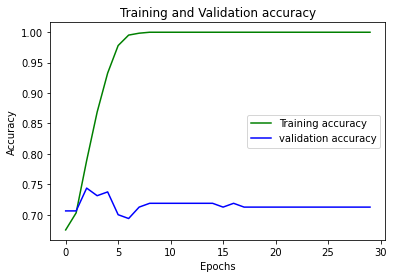

In [49]:
beginner.accuracy_vs_valaccuracy(model,history,30)

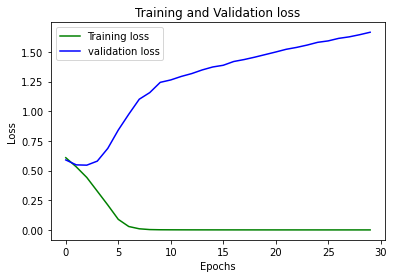

In [50]:
beginner.loss_vs_valloss(model,history,30)